In [1]:
import numpy as np

import librosa

import scipy.io.wavfile

import senmf

import itertools

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/home/gsmith/work/senmf/lib/python2.7/site-packages/librosa/core.py:26: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  'Falling back to scipy.signal')


### Compute a Spectrogram

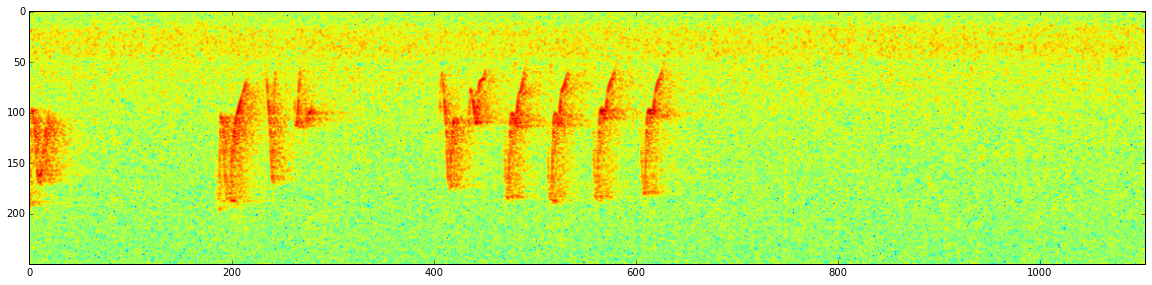

In [2]:
sr, x = scipy.io.wavfile.read('data/bird-songs.wav')
stft = librosa.stft(x, n_fft=1024, hop_length=200).T

X = np.abs(stft)[:,:250]
figure(figsize=(20,5))
imshow(np.log(X.T))

### Decompose the Spectrogram

In [3]:
nmf = senmf.SENMF(n_bases=5, window_width=15, X=X)
nmf.rand_D()
nmf.rand_A()

array([[ 2.69193003,  2.25030021,  2.20126289, ...,  2.81231266,
         2.56364036,  2.09188649],
       [ 2.08217016,  2.58985266,  2.06753902, ...,  2.51650564,
         2.89342424,  2.05559205],
       [ 2.54388315,  2.03368312,  2.10184768, ...,  2.70425867,
         2.46019801,  2.19320678],
       [ 2.61670271,  2.39905904,  2.89251935, ...,  2.76419624,
         2.7481696 ,  2.14251139],
       [ 2.42815874,  2.87556784,  2.38494591, ...,  2.47523851,
         2.73166808,  2.67882737]])

In [5]:
%time nmf.fit(5)

CPU times: user 8.52 s, sys: 2.17 s, total: 10.7 s
Wall time: 10.7 s


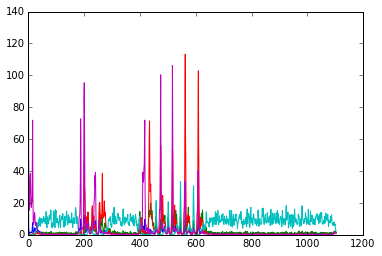

In [6]:
plot(nmf.A.T)

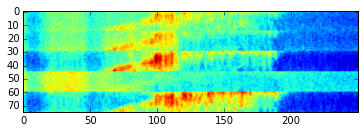

In [7]:
(x,y,z) = nmf.D.shape
imshow(np.log(nmf.D.reshape(x*y, z)))

### Inspect Decomposition

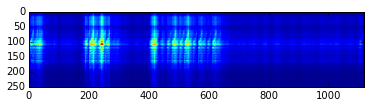

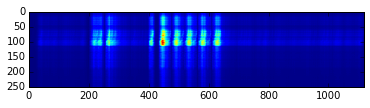

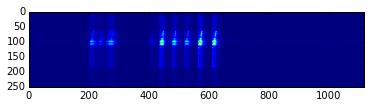

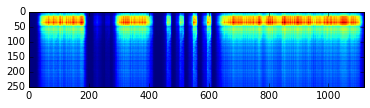

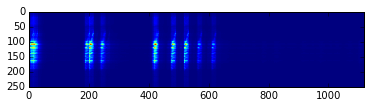

In [8]:
for i in range(nmf.n_bases):
    figure()
    imshow(nmf.reconstruct_basis(i))

#### Show the estimate

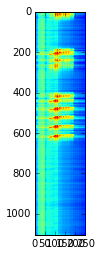

In [9]:
X_bar = nmf.reconstruct()
imshow(np.log(X_bar))

/usr/home/gsmith/work/senmf/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


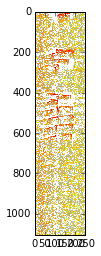

In [10]:
imshow(np.log(X-X_bar))